## Python - Numpy, Pandas, Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Load the datasets
data = pd.read_csv("/adult.data.txt",sep=",",header=None)

In [3]:
# Produce a pandas dataframe with proper column names
data.columns = ["Age","WorkClass","FinalWeight","Education","EducationNum","MaritalStatus","Occupation","Relationship",
               "Race","Sex","CapitalGain","CapitalLoss","HoursPerWeek","NativeCountry","Earning"]

In [4]:
data.head()

,Age,WorkClass,FinalWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Earning
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Looking for null values in each column

In [5]:
# Age column
a = data.Age.isnull().sum()
print ('There are %s null values in the Age column' % a)

# FinalWeight column
f = data.FinalWeight.isnull().sum()
print ('There are %s null values in the FinalWeight column' % f)

# Education column 
e = data.Education.isnull().sum()
print ('There are %s null values in the Education column' % e)

# EducationNum column 
en = data.EducationNum.isnull().sum()
print ('There are %s null values in the EducationNum column' % en)

# MaritalStatus column 
m = data.MaritalStatus.isnull().sum()
print ('There are %s null values in the MaritalStatus column' % m)

# Relationship column 
r = data.Relationship.isnull().sum()
print ('There are %s null values in the Relationship column' % r)

# Race column 
ra = data.Race.isnull().sum()
print ('There are %s null values in the Race column' % ra)

# Sex column 
s = data.Sex.isnull().sum()
print ('There are %s null values in the Sex column' % s)

# CapitalGain column 
cg = data.CapitalGain.isnull().sum()
print ('There are %s null values in the CapitalGain column' % cg)

# CapitalLoss column 
cl = data.CapitalLoss.isnull().sum()
print ('There are %s null values in the CapitalLoss column' % cl)

# HoursPerWeek column 
h = data.HoursPerWeek.isnull().sum()
print ('There are %s null values in the HoursPerWeek column' % h)

# Earning column 
er = data.Earning.isnull().sum()
print ('There are %s null values in the Earning column' % er)

There are 0 null values in the Age column
There are 0 null values in the FinalWeight column
There are 0 null values in the Education column
There are 0 null values in the EducationNum column
There are 0 null values in the MaritalStatus column
There are 0 null values in the Relationship column
There are 0 null values in the Race column
There are 0 null values in the Sex column
There are 0 null values in the CapitalGain column
There are 0 null values in the CapitalLoss column
There are 0 null values in the HoursPerWeek column
There are 0 null values in the Earning column


We notice that WorkClass, Occupation, and NativeCountry have the value of a question mark ? that we choose to replace with Other

In [6]:
# WorkClass column
data["WorkClass"].value_counts() 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64

In [7]:
data.loc[data.WorkClass == ' ?', 'WorkClass'] = " Other"
data["WorkClass"].value_counts() 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Other                1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64

In [8]:
# Occupation column
data["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [9]:
data.loc[data.Occupation == ' ?', 'Occupation'] = " Other"
data["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Other                1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [10]:
# NativeCountry column 
data["NativeCountry"].value_counts().head()

 United-States    29170
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
Name: NativeCountry, dtype: int64

In [11]:
data.loc[data.NativeCountry == ' ?', 'NativeCountry'] = " Other"
data["NativeCountry"].value_counts().head()

 United-States    29170
 Mexico             643
 Other              583
 Philippines        198
 Germany            137
Name: NativeCountry, dtype: int64

## Visualise the correlation of the numerical variables

In [12]:
# Getting a basic correlation plot
corr = data.corr()
corr

,Age,FinalWeight,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
FinalWeight,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
EducationNum,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
CapitalGain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
CapitalLoss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
HoursPerWeek,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


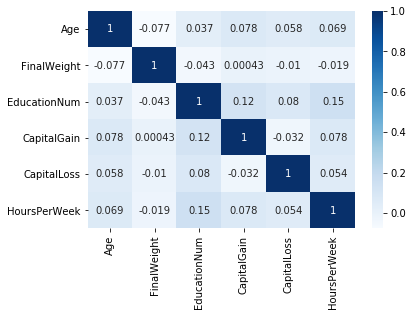

In [13]:
# Plotting a correlation matrix of the numerical values
sns.heatmap(corr, cmap='Blues', annot=True)

From the correlation matrix above we can see that all the numerical variables have very low correlations with each others. The highest correlations are between EducationNum and HoursPerWeek at 0.15, and EducationNum and CapitalGain at 0.12. This means that we don't have multicollinearity, which is good if we want to build a regression model on this data (at least for the numerical variables). 

## Visualise the relationships between Age, HoursPerWeek, and Earning, displaying the effect of Sex, Race, and Education

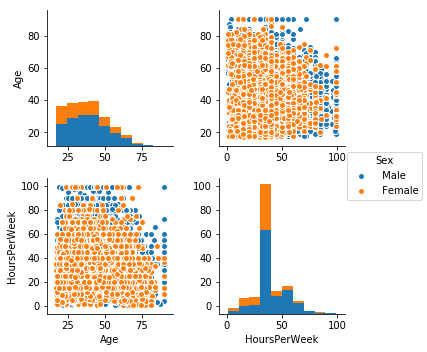

In [14]:
# Visualising the relationship between Age, HoursPerWeek, and Earning displaying the effect of Sex
sns.pairplot(data[['Age','HoursPerWeek','Earning','Sex']], hue='Sex', size=2.5);

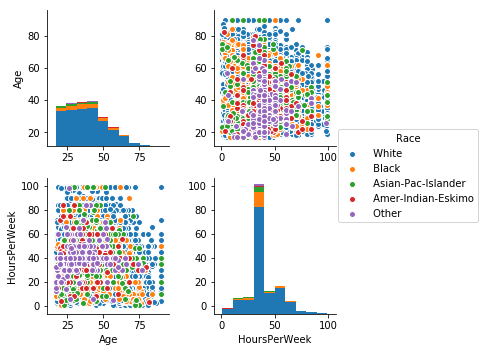

In [15]:
# Visualising the relationship between Age, HoursPerWeek, and Earning displaying the effect of Race
sns.pairplot(data[['Age','HoursPerWeek','Earning','Race']], hue='Race', size=2.5);

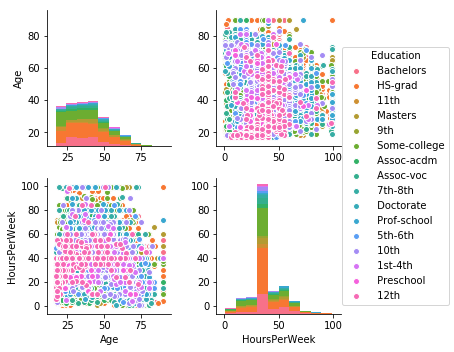

In [16]:
# Visualising the relationship between Age, HoursPerWeek, and Earning displaying the effect of Education
sns.pairplot(data[['Age','HoursPerWeek','Earning','Education']], hue='Education', size=2.5);